<a href="https://colab.research.google.com/github/aniscokyle/FTW-Exercises/blob/main/Feature_Engineering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_flights = pd.read_csv('https://raw.githubusercontent.com/iamsjdc/test/main/customer_flights.csv')

In [3]:
customer_flights.head()

,transaction_id,customer_id,flight_destination,flight_date,n_guests,booking_date,total_spend,flight_type
0,1,1,Domestic,2022-05-25,6,2022-05-16,4927.602815,Round-Trip
1,2,1,Domestic,2022-12-04,4,2022-11-23,12057.893554,Round-Trip
2,3,2,Domestic,2022-11-10,1,2022-10-22,5278.180024,Round-Trip
3,4,2,Long Haul,2022-12-03,1,2022-10-01,11990.266332,One-way
4,5,2,Domestic,2022-12-08,1,2022-11-29,4199.343073,Round-Trip


In [4]:
customer_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20007 entries, 0 to 20006
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      20007 non-null  int64  
 1   customer_id         20007 non-null  int64  
 2   flight_destination  20007 non-null  object 
 3   flight_date         20007 non-null  object 
 4   n_guests            20007 non-null  int64  
 5   booking_date        20007 non-null  object 
 6   total_spend         20007 non-null  float64
 7   flight_type         20007 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [5]:
customer_table = pd.read_csv('https://raw.githubusercontent.com/iamsjdc/test/main/customer_table.csv')

In [6]:
customer_table.head()

,customer_id,age,sex,region,major_region,married,no_of_children
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0


In [7]:
customer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     10000 non-null  int64 
 1   age             10000 non-null  int64 
 2   sex             10000 non-null  object
 3   region          10000 non-null  object
 4   major_region    10000 non-null  object
 5   married         10000 non-null  bool  
 6   no_of_children  10000 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 478.6+ KB


### **FLIGHTS**

In [8]:
#Days Between Departure and Booking

import datetime as dt
customer_flights['flight_date']=pd.to_datetime(customer_flights['flight_date'])
customer_flights['booking_date']=pd.to_datetime(customer_flights['booking_date'])

customer_flights['Lead_Time'] = customer_flights['flight_date'] - customer_flights['booking_date']
customer_flights

,transaction_id,customer_id,flight_destination,flight_date,n_guests,booking_date,total_spend,flight_type,Lead_Time
0,1,1,Domestic,2022-05-25,6,2022-05-16,4927.602815,Round-Trip,9 days
1,2,1,Domestic,2022-12-04,4,2022-11-23,12057.893554,Round-Trip,11 days
2,3,2,Domestic,2022-11-10,1,2022-10-22,5278.180024,Round-Trip,19 days
3,4,2,Long Haul,2022-12-03,1,2022-10-01,11990.266332,One-way,63 days
4,5,2,Domestic,2022-12-08,1,2022-11-29,4199.343073,Round-Trip,9 days
...,...,...,...,...,...,...,...,...,...
20002,20003,9998,Domestic,2022-11-21,4,2022-11-07,6260.768933,Open Jaw,14 days
20003,20004,9998,Domestic,2022-12-09,4,2022-11-20,5725.115089,One-way,19 days
20004,20005,9999,Long Haul,2022-04-21,2,2022-02-14,47971.335091,Round-Trip,66 days
20005,20006,10000,Domestic,2022-11-08,1,2022-10-23,4999.852193,Round-Trip,16 days


In [9]:
customer_flights['Days_bet_Departure_Booking'] = customer_flights['Lead_Time'].dt.days

In [10]:
customer_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20007 entries, 0 to 20006
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   transaction_id              20007 non-null  int64          
 1   customer_id                 20007 non-null  int64          
 2   flight_destination          20007 non-null  object         
 3   flight_date                 20007 non-null  datetime64[ns] 
 4   n_guests                    20007 non-null  int64          
 5   booking_date                20007 non-null  datetime64[ns] 
 6   total_spend                 20007 non-null  float64        
 7   flight_type                 20007 non-null  object         
 8   Lead_Time                   20007 non-null  timedelta64[ns]
 9   Days_bet_Departure_Booking  20007 non-null  int64          
dtypes: datetime64[ns](2), float64(1), int64(4), object(2), timedelta64[ns](1)
memory usage: 1.5+ MB


In [11]:
new=pd.pivot_table(customer_flights, values=['n_guests', 'Days_bet_Departure_Booking', 'total_spend'], index=['customer_id'], aggfunc=np.mean)
new.rename(columns = {"n_guests": "ave_guests", 'total_spend': 'ave_spend_per_booking', 'Days_bet_Departure_Booking': 'ave_days_booking_departure' }, inplace = True)
new

,ave_days_booking_departure,ave_guests,ave_spend_per_booking
customer_id,,,
1,10.0,5.000000,8492.748185
2,29.5,1.333333,5321.385269
3,36.0,2.000000,14140.605762
4,49.5,3.000000,21605.032534
5,20.0,1.000000,1798.454174
...,...,...,...
9996,24.0,3.000000,13670.373345
9997,8.0,1.000000,5760.485393
9998,17.5,3.000000,4302.625015


In [12]:
new['total_flights']=customer_flights.value_counts("customer_id")
new

,ave_days_booking_departure,ave_guests,ave_spend_per_booking,total_flights
customer_id,,,,
1,10.0,5.000000,8492.748185,2
2,29.5,1.333333,5321.385269,6
3,36.0,2.000000,14140.605762,2
4,49.5,3.000000,21605.032534,4
5,20.0,1.000000,1798.454174,1
...,...,...,...,...
9996,24.0,3.000000,13670.373345,3
9997,8.0,1.000000,5760.485393,1
9998,17.5,3.000000,4302.625015,4


In [13]:
min_g=customer_flights.groupby('customer_id').min('n_guests')
min_g

,transaction_id,n_guests,total_spend,Days_bet_Departure_Booking
customer_id,,,,
1,1,4,4927.602815,9
2,3,1,2693.796789,9
3,9,1,2503.456675,13
4,11,2,6564.461561,12
5,15,1,1798.454174,20
...,...,...,...,...
9996,19997,1,2370.252180,7
9997,20000,1,5760.485393,8
9998,20001,2,1039.494696,14


In [14]:
w_min_guests = pd.concat([new, min_g['n_guests']], axis=1)
w_min_guests.rename(columns = {"n_guests": "min_guests" }, inplace = True)
w_min_guests

,ave_days_booking_departure,ave_guests,ave_spend_per_booking,total_flights,min_guests
customer_id,,,,,
1,10.0,5.000000,8492.748185,2,4
2,29.5,1.333333,5321.385269,6,1
3,36.0,2.000000,14140.605762,2,1
4,49.5,3.000000,21605.032534,4,2
5,20.0,1.000000,1798.454174,1,1
...,...,...,...,...,...
9996,24.0,3.000000,13670.373345,3,1
9997,8.0,1.000000,5760.485393,1,1
9998,17.5,3.000000,4302.625015,4,2


In [15]:
max_g=customer_flights.groupby('customer_id').max('n_guests')
max_g

,transaction_id,n_guests,total_spend,Days_bet_Departure_Booking
customer_id,,,,
1,2,6,12057.893554,11
2,8,3,11990.266332,63
3,10,3,25777.754850,59
4,14,6,47151.844134,67
5,15,1,1798.454174,20
...,...,...,...,...
9996,19999,5,24001.674387,56
9997,20000,1,5760.485393,8
9998,20004,4,6260.768933,21


In [16]:
complete1 = pd.concat([w_min_guests, max_g['n_guests']], axis=1)
complete1.rename(columns = {"n_guests": "max_guests" }, inplace = True)
complete1

,ave_days_booking_departure,ave_guests,ave_spend_per_booking,total_flights,min_guests,max_guests
customer_id,,,,,,
1,10.0,5.000000,8492.748185,2,4,6
2,29.5,1.333333,5321.385269,6,1,3
3,36.0,2.000000,14140.605762,2,1,3
4,49.5,3.000000,21605.032534,4,2,6
5,20.0,1.000000,1798.454174,1,1,1
...,...,...,...,...,...,...
9996,24.0,3.000000,13670.373345,3,1,5
9997,8.0,1.000000,5760.485393,1,1,1
9998,17.5,3.000000,4302.625015,4,2,4


## **CUSTOMERS**

In [17]:
customer_table.head()

,customer_id,age,sex,region,major_region,married,no_of_children
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0


<Axes: xlabel='age', ylabel='Count'>

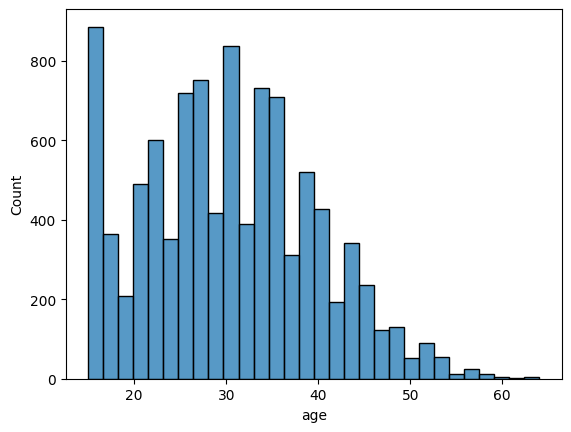

In [18]:
sns.histplot(data=customer_table, x='age', bins=30)

In [19]:
no_of_children = pd.DataFrame(customer_table.value_counts("no_of_children", ascending=False).reset_index().values, columns=['no_of_children', "total"])

no_of_children['no_of_children'] = no_of_children['no_of_children'].astype(str)

no_of_children

,no_of_children,total
0,0,8105
1,1,1089
2,2,547
3,3,205
4,4,43
5,5,9
6,6,1
7,8,1


<Axes: xlabel='Total', ylabel='region'>

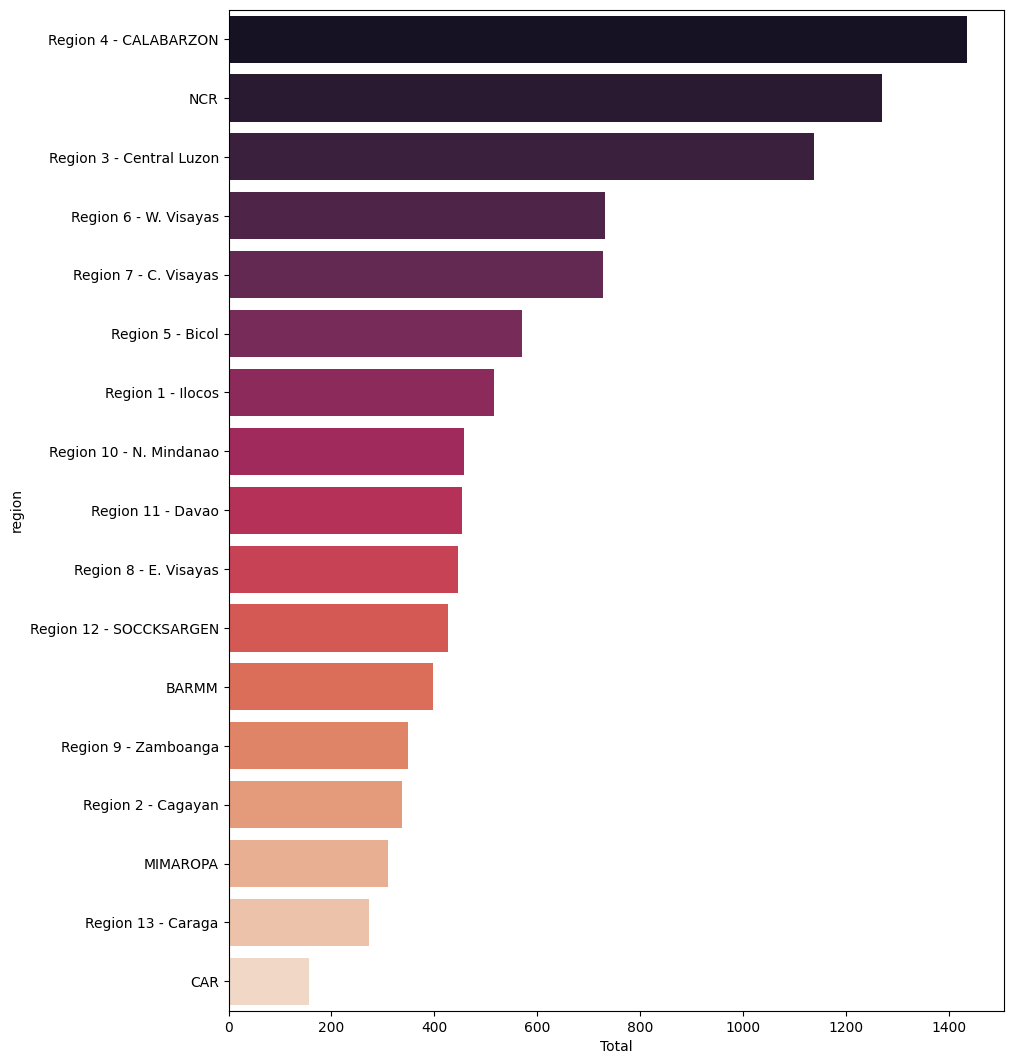

In [20]:
region = pd.DataFrame(customer_table.value_counts("region", ascending=False).reset_index().values, columns=['region', "Total"])
f, ax = plt.subplots(figsize=(10, 13))
sns.barplot(x="Total", y="region", data=region, palette='rocket')

<Axes: xlabel='major_region', ylabel='count'>

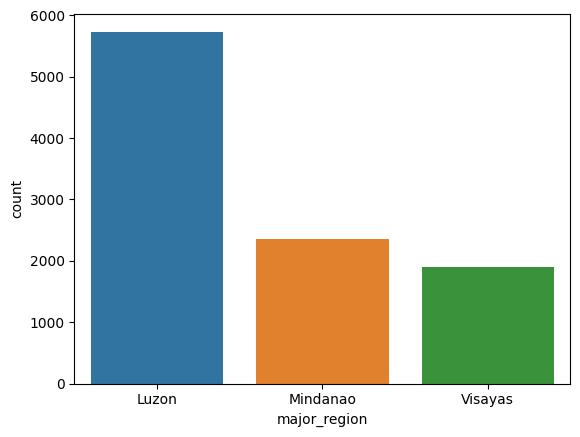

In [21]:
sns.countplot(data=customer_table, x='major_region')

In [22]:
conditions = [


    (customer_table['no_of_children'] >= 1),


    (customer_table['no_of_children'] == '0')


]

labels = [1,0]
customer_table['has_children'] =np.select(conditions, labels)

customer_table

,customer_id,age,sex,region,major_region,married,no_of_children,has_children
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2,1
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0,0
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2,1
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1,1
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0,0
...,...,...,...,...,...,...,...,...
9995,9996,44,F,Region 13 - Caraga,Mindanao,True,2,1
9996,9997,46,F,Region 1 - Ilocos,Luzon,False,0,0
9997,9998,38,F,Region 2 - Cagayan,Luzon,True,0,0
9998,9999,15,M,Region 3 - Central Luzon,Luzon,True,0,0


In [23]:
condition = [


    (customer_table['major_region'] == "Luzon"),


    (customer_table['major_region'] == {'Visayas', 'Mindanao'})


]

label = [1,0]
customer_table['in_luzon'] =np.select(condition, label)

customer_table

,customer_id,age,sex,region,major_region,married,no_of_children,has_children,in_luzon
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2,1,1
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0,0,0
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2,1,0
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1,1,1
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0,0,1
...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,Region 13 - Caraga,Mindanao,True,2,1,0
9996,9997,46,F,Region 1 - Ilocos,Luzon,False,0,0,1
9997,9998,38,F,Region 2 - Cagayan,Luzon,True,0,0,1
9998,9999,15,M,Region 3 - Central Luzon,Luzon,True,0,0,1


In [24]:
customer_table1 = customer_table.copy()                                             
customer_table1 ['is_married'] = customer_table1['married'].map({True: 1, False: 0})     
customer_table1

,customer_id,age,sex,region,major_region,married,no_of_children,has_children,in_luzon,is_married
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2,1,1,1
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0,0,0,0
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2,1,0,0
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1,1,1,1
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,Region 13 - Caraga,Mindanao,True,2,1,0,1
9996,9997,46,F,Region 1 - Ilocos,Luzon,False,0,0,1,0
9997,9998,38,F,Region 2 - Cagayan,Luzon,True,0,0,1,1
9998,9999,15,M,Region 3 - Central Luzon,Luzon,True,0,0,1,1


In [25]:
customers = pd.merge(customer_table1, complete1, on="customer_id", how="right")

customers

,customer_id,age,sex,region,major_region,married,no_of_children,has_children,in_luzon,is_married,ave_days_booking_departure,ave_guests,ave_spend_per_booking,total_flights,min_guests,max_guests
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2,1,1,1,10.0,5.000000,8492.748185,2,4,6
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0,0,0,0,29.5,1.333333,5321.385269,6,1,3
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2,1,0,0,36.0,2.000000,14140.605762,2,1,3
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1,1,1,1,49.5,3.000000,21605.032534,4,2,6
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0,0,1,0,20.0,1.000000,1798.454174,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,Region 13 - Caraga,Mindanao,True,2,1,0,1,24.0,3.000000,13670.373345,3,1,5
9996,9997,46,F,Region 1 - Ilocos,Luzon,False,0,0,1,0,8.0,1.000000,5760.485393,1,1,1
9997,9998,38,F,Region 2 - Cagayan,Luzon,True,0,0,1,1,17.5,3.000000,4302.625015,4,2,4
9998,9999,15,M,Region 3 - Central Luzon,Luzon,True,0,0,1,1,66.0,2.000000,47971.335091,1,2,2


In [26]:
customers['ave_spend_per_booking_per_guest']=customers['ave_spend_per_booking']/customers['ave_guests']
customers

,customer_id,age,sex,region,major_region,married,no_of_children,has_children,in_luzon,is_married,ave_days_booking_departure,ave_guests,ave_spend_per_booking,total_flights,min_guests,max_guests,ave_spend_per_booking_per_guest
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2,1,1,1,10.0,5.000000,8492.748185,2,4,6,1698.549637
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0,0,0,0,29.5,1.333333,5321.385269,6,1,3,3991.038952
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2,1,0,0,36.0,2.000000,14140.605762,2,1,3,7070.302881
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1,1,1,1,49.5,3.000000,21605.032534,4,2,6,7201.677511
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0,0,1,0,20.0,1.000000,1798.454174,1,1,1,1798.454174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,Region 13 - Caraga,Mindanao,True,2,1,0,1,24.0,3.000000,13670.373345,3,1,5,4556.791115
9996,9997,46,F,Region 1 - Ilocos,Luzon,False,0,0,1,0,8.0,1.000000,5760.485393,1,1,1,5760.485393
9997,9998,38,F,Region 2 - Cagayan,Luzon,True,0,0,1,1,17.5,3.000000,4302.625015,4,2,4,1434.208338
9998,9999,15,M,Region 3 - Central Luzon,Luzon,True,0,0,1,1,66.0,2.000000,47971.335091,1,2,2,23985.667546


In [27]:
def classify_generation(age):
    
    if age >= 78:
        return "Silent Generation"
    elif age >= 59:
        return "Baby Boomer"
    elif age >= 43:
        return "Generation X"
    elif age >= 27:
        return "Millennial"
    else:
        return "Generation Z"

customers['Generation'] = customers['age'].apply(classify_generation)
customers


,customer_id,age,sex,region,major_region,married,no_of_children,has_children,in_luzon,is_married,ave_days_booking_departure,ave_guests,ave_spend_per_booking,total_flights,min_guests,max_guests,ave_spend_per_booking_per_guest,Generation
0,1,36,F,Region 3 - Central Luzon,Luzon,True,2,1,1,1,10.0,5.000000,8492.748185,2,4,6,1698.549637,Millennial
1,2,37,M,Region 9 - Zamboanga,Mindanao,False,0,0,0,0,29.5,1.333333,5321.385269,6,1,3,3991.038952,Millennial
2,3,29,M,Region 6 - W. Visayas,Visayas,False,2,1,0,0,36.0,2.000000,14140.605762,2,1,3,7070.302881,Millennial
3,4,25,F,Region 3 - Central Luzon,Luzon,True,1,1,1,1,49.5,3.000000,21605.032534,4,2,6,7201.677511,Generation Z
4,5,36,F,Region 4 - CALABARZON,Luzon,False,0,0,1,0,20.0,1.000000,1798.454174,1,1,1,1798.454174,Millennial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,44,F,Region 13 - Caraga,Mindanao,True,2,1,0,1,24.0,3.000000,13670.373345,3,1,5,4556.791115,Generation X
9996,9997,46,F,Region 1 - Ilocos,Luzon,False,0,0,1,0,8.0,1.000000,5760.485393,1,1,1,5760.485393,Generation X
9997,9998,38,F,Region 2 - Cagayan,Luzon,True,0,0,1,1,17.5,3.000000,4302.625015,4,2,4,1434.208338,Millennial
9998,9999,15,M,Region 3 - Central Luzon,Luzon,True,0,0,1,1,66.0,2.000000,47971.335091,1,2,2,23985.667546,Generation Z


In [28]:
customers['Generation'].value_counts()

Millennial      5293
Generation Z    3622
Generation X    1072
Baby Boomer       13
Name: Generation, dtype: int64

In [30]:
marriage_dist = customers['married'].value_counts()
marriage_dist

False    6028
True     3972
Name: married, dtype: int64

In [31]:
gender_dist = customers['sex'].value_counts()
gender_lbl=['Female', 'Male', "Other"]
gender_dist

F        5104
M        4592
Other     304
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fce22836910>,
 [Text(-1.0994129295130497, -0.03593341647455743, 'Female'),
  Text(1.0978293989430645, -0.06906960848527939, 'Male'),
  Text(0.10489528164398446, 1.094987205353939, 'Other')],
 [Text(-0.5996797797343907, -0.019600045349758597, '51.0%'),
  Text(0.598816035787126, -0.03767433190106148, '45.9%'),
  Text(0.05721560816944606, 0.5972657483748757, '3.0%')])

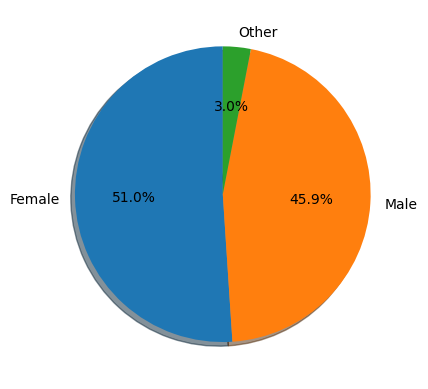

In [32]:
fig1, ax1 = plt.subplots()

ax1.pie(gender_dist, labels=gender_lbl, autopct='%1.1f%%',shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x7fce2263f1c0>,
 [Text(-0.0359334164745575, 1.0994129295130497, 'Female'),
  Text(-0.06906960848527934, -1.0978293989430645, 'Male'),
  Text(1.0949872053539391, -0.1048952816439844, 'Other')],
 [Text(-0.019600045349758632, 0.5996797797343907, '51%'),
  Text(-0.037674331901061446, -0.598816035787126, '46%'),
  Text(0.5972657483748758, -0.05721560816944603, '3%')])

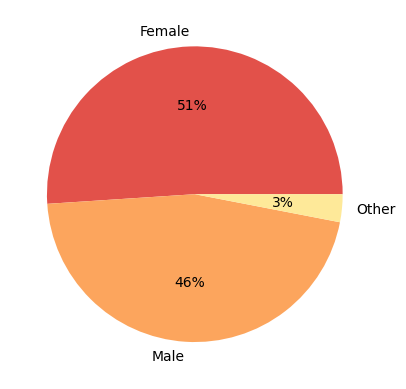

In [33]:
import seaborn as sns
palette_color = sns.color_palette('Spectral')

plt.pie(gender_dist, labels=gender_lbl, colors=palette_color, autopct='%.0f%%')


In [34]:
cu1=pd.pivot_table(customers, values=['age'], index=['sex'], aggfunc=np.median)
cu1

,age
sex,
F,30
M,30
Other,31


In [35]:
cu2=pd.pivot_table(customers, values=['ave_spend_per_booking_per_guest'], index=['sex'], aggfunc=np.median)
cu2

,ave_spend_per_booking_per_guest
sex,
F,4660.800160
M,4727.612773
Other,4341.579892
